###Text-to-Text Transfer Transformer(T5)の実装し，モデル構造の可視化と様々な種類の文章で要約を行い、T5についてまとめた．

## 1.T5-largeの実装

In [ ]:
!pip install transformers==4.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 70.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects


In [ ]:
!pip install sentencepiece==0.1.94

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.5/507.5 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentencepiece: filename=sentencepiece-0.1.94-cp310-cp310-linux_x86_64.whl size=1426799 sha256=381d3c25f7877efcfc7cb06a9f152f5a84ae380da88efde9a55c794aeb175009
  Stored in directory: /root/.cache/pip/wheels/09/a1/54/a3196ca6f241737de6ae3dcdf00a80383f9dd5e5f7dc78a97e
Successfully built sentencepiece


In [ ]:
import torch
import json
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-large')
tokenizer = T5Tokenizer.from_pretrained('t5-large')
device = torch.device('cpu')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use th

### 1.1. T5について

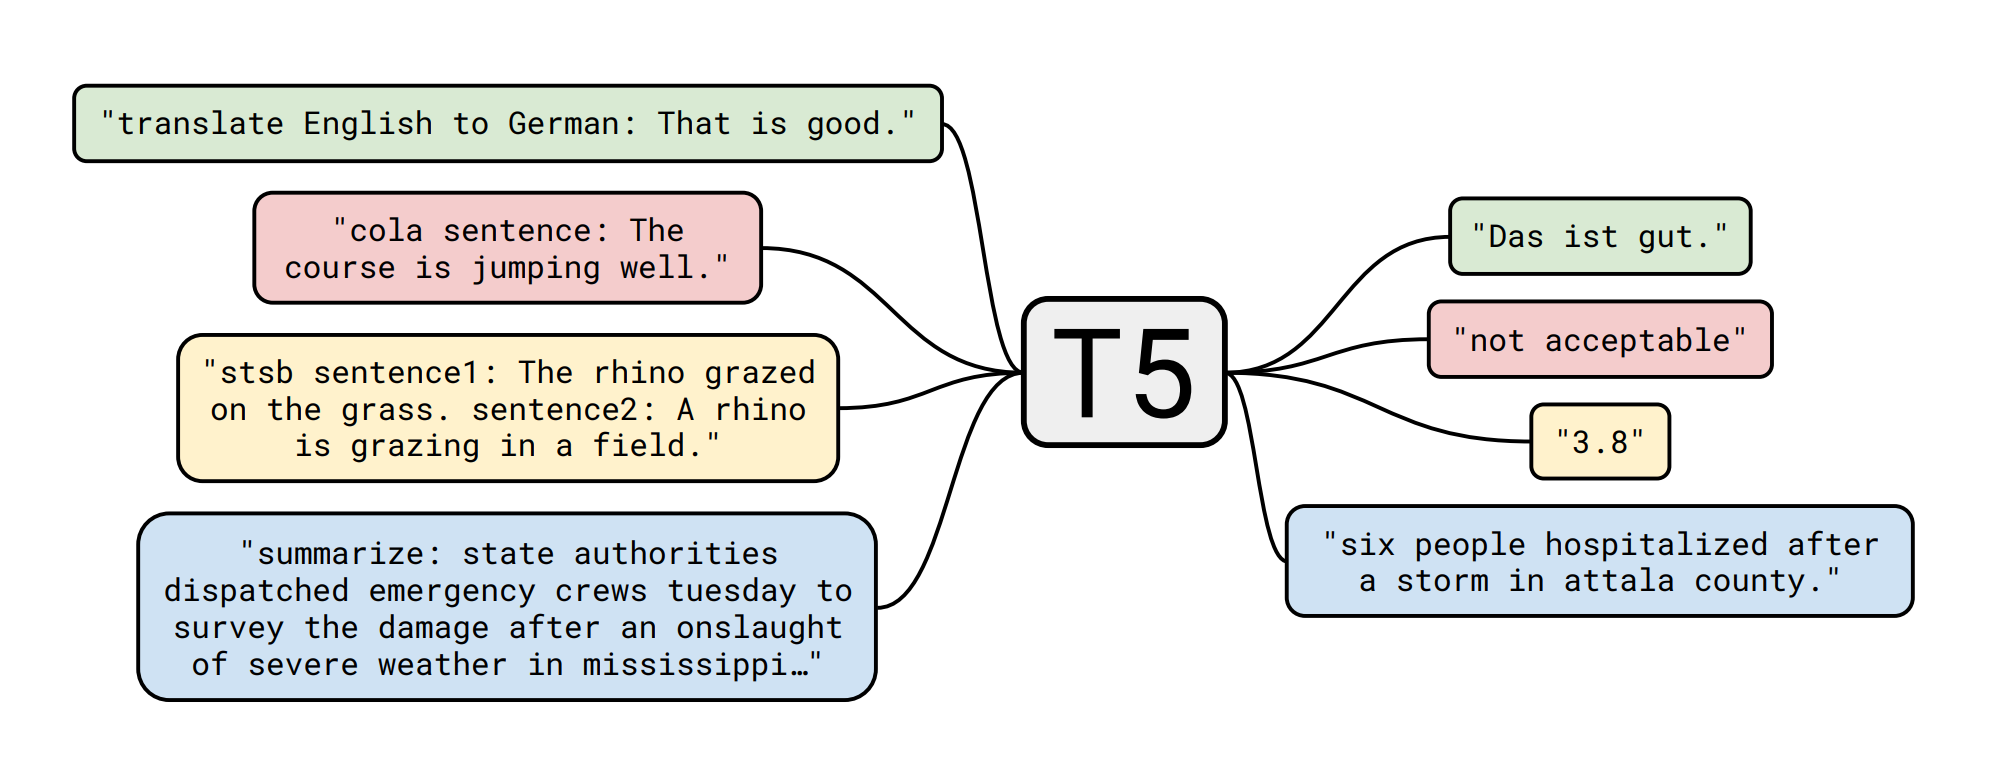

- T5は，入力と出力の両方をテキストのフォーマットに統一して，転移学習を行うモデルである

- 翻訳，質疑応答，分類，要約などすべてのタスクで入力をテキストで受けて，出力もテキストの形で返す

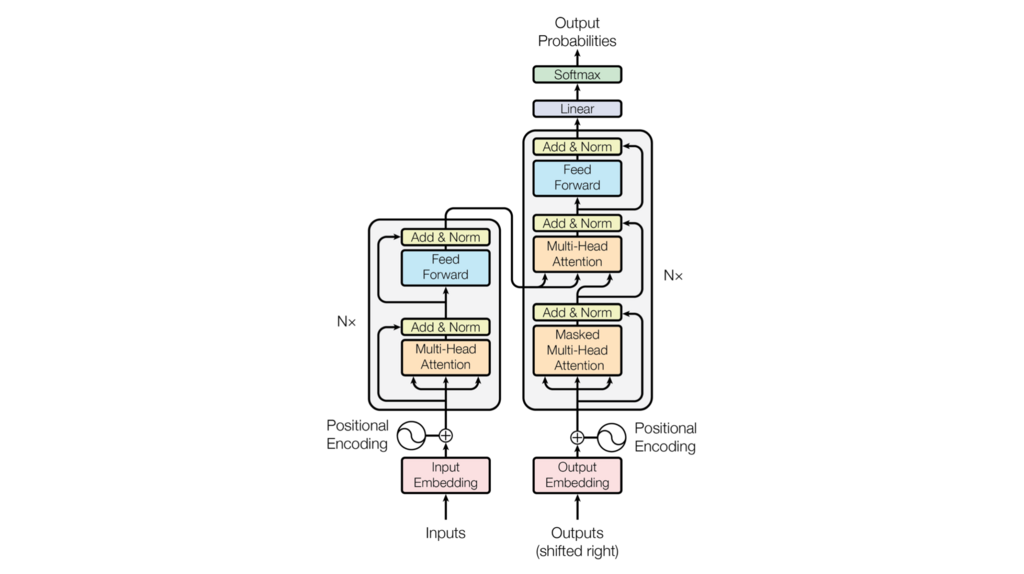

**T5のモデルの構造**
- Embedding
 - 単語をベクトルに変換

- Multi-Head Attention
 - アテンション機構で各トークンのベクトルを(全トークンとの関係性を取り込むことで)より良い表現に変換
$$
  Attention(Q, K, V) = softmax \left( \frac{QK^\top}{\sqrt{d_k}} \right) V  
$$
 - $Q$ (query), $K$ (keys), $V$ (values)

- Feed Forward
 - 巨大な2階層のMLP

- Others
 - 残差接続
 - レイヤー正規化
 - 出力層

## 2.モデル構造の可視化

In [ ]:
display_architecture=True

### 2.1. Config

In [ ]:
if display_architecture==True:
 print(model.config)

T5Config {
  "_name_or_path": "t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
 

### 2.2. Encoder - Decoder

In [ ]:
if(display_architecture==True):
  print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

## 3.要約の実装

In [ ]:
def summarize(text,ml):
  preprocess_text = text.strip().replace("\n","")
  # 接頭辞をつける
  t5_prepared_Text = "summarize: "+preprocess_text
  print ("本文: \n", t5_prepared_Text)

  tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

  # summmarize
  summary_ids = model.generate(tokenized_text,
                                      num_beams=4,
                                      no_repeat_ngram_size=2,
                                      min_length=30,
                                      max_length=200,
                                      early_stopping=True)

  output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
  return output

### 3.1. 要約(1回目)

In [ ]:
#プロジェクト・グーテンベルク(アメリカ独立宣言）, https://www.gutenberg.org/ebooks/300
text="""
The United States Declaration of Independence was the first Etext
released by Project Gutenberg, early in 1971.  The title was stored
in an emailed instruction set which required a tape or diskpack be
hand mounted for retrieval.  The diskpack was the size of a large
cake in a cake carrier, cost $1500, and contained 5 megabytes, of
which this file took 1-2%.  Two tape backups were kept plus one on
paper tape.  The 10,000 files we hope to have online by the end of
2001 should take about 1-2% of a comparably priced drive in 2001.
"""
print("文字数:",len(text))

文字数: 534


In [ ]:
summary=summarize(text,50)
print ("\n\n要約文: \n",summary)

本文: 
 summarize: The United States Declaration of Independence was the first Etextreleased by Project Gutenberg, early in 1971.  The title was storedin an emailed instruction set which required a tape or diskpack behand mounted for retrieval.  The diskpack was the size of a largecake in a cake carrier, cost $1500, and contained 5 megabytes, ofwhich this file took 1-2%.  Two tape backups were kept plus one onpaper tape.  The 10,000 files we hope to have online by the end of2001 should take about 1-2% of a comparably priced drive in 2001.


要約文: 
 the united states declaration of independence was the first etext published by project gutenberg, early in 1971. the 10,000 files we hope to have online by the end of2001 should take about 1-2% of a comparably priced drive in 2001.


### 3.2. 要約(2回目)

In [ ]:
#アメリカ権利章典(第5条), https://www.law.cornell.edu/constitution
text ="""
No person shall be held to answer for a capital, or otherwise infamous crime,
unless on a presentment or indictment of a Grand Jury, except in cases arising
in the land or naval forces, or in the Militia, when in actual service
in time of War or public danger; nor shall any person be subject for
the same offense to be twice put in jeopardy of life or limb;
nor shall be compelled in any criminal case to be a witness against himself,
nor be deprived of life, liberty, or property, without due process of law;
nor shall private property be taken for public use without just compensation.

"""
print("文字数:",len(text))

文字数: 591


In [ ]:
summary=summarize(text,50)
print ("\n\n要約文: \n",summary)

本文: 
 summarize: No person shall be held to answer for a capital, or otherwise infamous crime,unless on a presentment or indictment of a Grand Jury, except in cases arisingin the land or naval forces, or in the Militia, when in actual servicein time of War or public danger; nor shall any person be subject forthe same offense to be twice put in jeopardy of life or limb;nor shall be compelled in any criminal case to be a witness against himself,nor be deprived of life, liberty, or property, without due process of law;nor shall private property be taken for public use without just compensation.


要約文: 
 no person shall be held to answer for a capital, or otherwise infamous crime, unless ona presentment or indictment ofa Grand Jury. nor shall any person be subject for the same offense to be twice put


### 3.3. 要約(3回目)

In [ ]:
#アメリカ　モンタナ州の会社法, https://corporations.uslegal.com/state-corporation-law/montana-corporation-law/#:~:text=Montana%20Corporation%20Law,carrying%20out%20its%20business%20activities.

text ="""The law regarding corporations prescribes that a corporation can be incorporated in the state of Montana to serve any lawful purpose.  In the state of Montana, a corporation has all the powers of a natural person for carrying out its business activities.  The corporation can sue and be sued in its corporate name.  It has perpetual succession.  The corporation can buy, sell or otherwise acquire an interest in a real or personal property.  It can conduct business, carry on operations, and have offices and exercise the powers in a state, territory or district in possession of the U.S., or in a foreign country.  It can appoint officers and agents of the corporation for various duties and fix their compensation.
The name of a corporation must contain the word “corporation” or its abbreviation “corp.”  The name of a corporation should not be deceptively similar to the name of another corporation incorporated in the same state.  It should not be deceptively identical to the fictitious name adopted by a foreign corporation having business transactions in the state.
The corporation is formed by one or more natural persons by executing and filing articles of incorporation to the secretary of state of filing.  The qualifications for directors are fixed either by articles of incorporation or bylaws.  The names and addresses of the initial directors and purpose of incorporation should be set forth in the articles of incorporation.  The articles of incorporation should contain the corporate name, the number of shares authorized to issue, a brief statement of the character of business carried out by the corporation, the names and addresses of the directors until successors are elected, and name and addresses of incorporators.  The shareholders have the power to change the size of board of directors.
"""
print("文字数:",len(text))

文字数: 1816


In [ ]:
summary=summarize(text,50)
print ("\n\n要約文: \n",summary)

本文: 
 summarize: The law regarding corporations prescribes that a corporation can be incorporated in the state of Montana to serve any lawful purpose.  In the state of Montana, a corporation has all the powers of a natural person for carrying out its business activities.  The corporation can sue and be sued in its corporate name.  It has perpetual succession.  The corporation can buy, sell or otherwise acquire an interest in a real or personal property.  It can conduct business, carry on operations, and have offices and exercise the powers in a state, territory or district in possession of the U.S., or in a foreign country.  It can appoint officers and agents of the corporation for various duties and fix their compensation.The name of a corporation must contain the word “corporation” or its abbreviation “corp.”  The name of a corporation should not be deceptively similar to the name of another corporation incorporated in the same state.  It should not be deceptively identical to the fi

## 4. 参考文献

[[1]](https://arxiv.org/abs/1910.10683) Colin Raffel, Noam Shazeer, Adam Roberts, Katherine Lee, Sharan Narang, Michael Matena, Yanqi Zhou, Wei Li & Peter J. Liu, "Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer", arXiv:1910.10683

[[2]](https://huggingface.co/t5-large) Hagging Face, t5-large